<a href="https://colab.research.google.com/github/yanness168/wine_text_classification_neural_network/blob/main/tensorflow_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [5]:
# To extract the columns within 'usecols' only
df_w = pd.read_csv('wine-reviews.csv', usecols= ['country', 'description', 'points', 'price', 'variety', 'winery'])

In [6]:
df_w.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [7]:
df_w = df_w.dropna(subset= ['description', 'points'])

## Diabetes data sets

In [6]:
# df_d.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
# x = df_d[df_d.columns[:-1]].values
# y = df_d[df_d.columns[-1]].values

In [10]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # Scale the feature sets
# x = scaler.fit_transform(x)
# # Put back the feature sets + label column
# data = np.hstack((x, np.reshape(y,(-1,1))))
# # Convert array back to data frame
# transformed_df = pd.DataFrame(data, columns=df_d.columns)

In [11]:
# for label in df_d.columns[:-1]:  # Exclude the last column (Outcome) from the loop
#     plt.hist(transformed_df[transformed_df['Outcome'] == 1][label], color='red', label="Diabetes", alpha=0.5, density=True, bins=15) #alpha adjusts transparency
#                                                                                           #When density=True is set, the histogram is normalized such that the area under the histogram is equal to 1.
#     plt.hist(transformed_df[transformed_df['Outcome'] == 0][label], color='blue', label="No Diabetes", alpha=0.5, density=True, bins=15)
#     plt.title(label)
#     plt.ylabel("Probability") # Cuz normalized, it means count/total
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()

### **Oversampling to make both classes the same amount**

In [23]:
from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# x_resampled, y_resampled = ros.fit_resample(x, y)
# print(np.bincount(y_resampled))

In [27]:
from sklearn.model_selection import train_test_split
# x_train, x_temp, y_train, y_temp = train_test_split(x_resampled,y_resampled, test_size=0.4, random_state=0)
# x_valid, x_test, y_valid, y_test = train_test_split(x_temp,y_temp, test_size=0.5, random_state=0)

In [14]:
# from keras.layers.attention.multi_head_attention import activation
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [15]:
# from keras.engine.training import optimizer
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=['accuracy'])

In [16]:
# model.fit(x_train,y_train, batch_size=16,epochs=20,validation_data=(x_valid, y_valid))

In [17]:
# model.evaluate(x_test,y_test)

## Wine data set

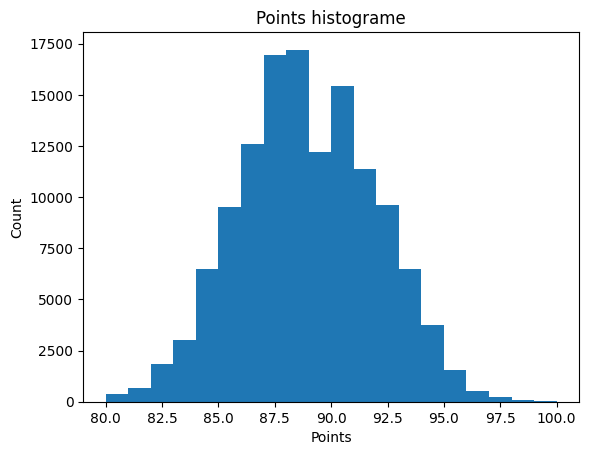

In [18]:
plt.hist(df_w['points'], bins=20)
plt.title("Points histograme")
plt.ylabel("Count")
plt.xlabel('Points')
plt.show()

In [19]:
df_w["label"] = (df_w["points"] >= 90).astype(int) # otherwise, 0
df_w = df_w[["description", "points", "label"]]

In [20]:
df_w["label"].value_counts()

0    80926
1    49045
Name: label, dtype: int64

In [24]:
# Reshape the input arrays to 2D
ros = RandomOverSampler(random_state=42)
X = df_w["description"].values.reshape(-1, 1)
y = df_w["label"].values.reshape(-1, 1)
x_resampled, y_resampled = ros.fit_resample(X, y)

In [25]:
x_resampled

array([["Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."],
       ["This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016."],
       ['Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.'],
       ...,
       ['Produced from 60-year-old vines, this wine has a great balance between crisp acidity and ripe yellow and white stone fruit flavors. It is rich with a touch of toast and spice from wood fermentation and aging. The wine is still young and will be better from 2018.'],
       ["This wine is pretty and floral in violet and lavender, soft, smooth and simply r

In [28]:
# Split the data set into training, validation, testing
# train, val, test = np.split(df_w.sample(frac=1, random_state=42), [int(0.8*len(df_w)), int(0.9*len(df_w))])
x_train, x_temp, y_train, y_temp = train_test_split(x_resampled,y_resampled, test_size=0.8, random_state = 42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp,y_temp, test_size=0.9, random_state = 42)

In [29]:
x_train

array([['Ripe, succulent peach and melon flavors mark this dry but lusciously textured Sauvignon Blanc. Crisp and minerally, yet juicy and thirst quenching, this has so much dimension in each sip. It finishes quite floral, with just a touch of lime-pith astringency.'],
       ["Good price for a nice, dry Cabernet with so much fruit. It's forward in ripe blackberry, blueberry and cherry jam flavors, with a rich coat of smoky oak."],
       ["Juicy in cassis and black cherry before taking on beguiling layers of peppercorn, chicory, tobacco and black tea, this Cab has a lot going on from the get-go, and yet there's no doubt about its ability to take on further nuance and complexity with time. Bittersweet chocolate accents the finish. Enjoy through 2027–2030."],
       ...,
       ["Penetrating flavors of preserved peach and honey are nuanced by layers of saffron, pollen and high-toned acidity in this sun-kissed auslese. It's delicate in body, yet concentrated in flavor and ripples of swee

In [31]:
train_dataset = {
    'description': x_train,
    'label': y_train
}

valid_dataset = {
    'description': x_valid,
    'label': y_valid
}

test_dataset = {
    'description': x_test,
    'label': y_test
}

# Reshape 2D arrays to 1D arrays using np.squeeze
x_train_1d = np.squeeze(x_train)
y_train_1d = np.squeeze(y_train)
x_valid_1d = np.squeeze(x_valid)
y_valid_1d = np.squeeze(y_valid)
x_test_1d = np.squeeze(x_test)
y_test_1d = np.squeeze(y_test)

# Create data frames from the 1D arrays
train_df = pd.DataFrame({'description': x_train_1d, 'label': y_train_1d})
valid_df = pd.DataFrame({'description': x_valid_1d, 'label': y_valid_1d})
test_df = pd.DataFrame({'description': x_test_1d, 'label': y_test_1d})

In [32]:
train_df

,description,label
0,"Ripe, succulent peach and melon flavors mark t...",1
1,"Good price for a nice, dry Cabernet with so mu...",0
2,Juicy in cassis and black cherry before taking...,1
3,"Reserved notes of desiccated black fruit, loam...",0
4,"Aromas of struck match, seared lemon, roasted ...",0
...,...,...
32365,"This blend of Cabernet Sauvignon, Merlot and M...",0
32366,"Aromas of fragrant spring blossom, orchard fru...",1
32367,Penetrating flavors of preserved peach and hon...,1
32368,This big boy greets us with his deep ruby/blac...,1


In [33]:
# this function prepares the data from the pandas DataFrame in a way that is suitable for feeding it into a TensorFlow model efficiently
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
    dataframe = dataframe.copy()
    labels = dataframe.pop('label')
    df = dataframe["description"]
    ds = tf.data.Dataset.from_tensor_slices((df, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

In [34]:
train_data = df_to_dataset(train_df)
val_data = df_to_dataset(valid_df)
test_data = df_to_dataset(test_df)

In [38]:
list(train_data)[0] # [0] to retreive the first batch of data

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b"Chalk, cherry, crushed clove and nutmeg are all present on the nose from this 81% Cabernet Sauvignon / 19% Merlot from Paso Robles' Westside. It's juicy and vibrant once sipped, with deep red fruits and a blackberry finish. The wine isn't particularly complicated wine and there's isn't much tannic backbone for long cellaring, but it's tasty, approachable and easy-drinking now.",
        b'A delicate honeycomb flavor fringes pleasant apple and white flower notes on this dry, refreshing Tokaji blend. Lemony acidity adds structure and length to the finish. This is good introduction to Tokaji for those who prefer a dry style.',
        b'Aromas of raw oak, cinnamon, bacon and clove outmuscle fruit on this rough, tannic, scraping 2013. Flavors of toast, chocolate and baking spices push blackberry and black-plum fruit towards an oaky, abrasive finish with rocky tannins and accents of chocolate and cinnamon. Holding this for another c

# Embedding + Model

In [39]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable = True)

In [40]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.30836442, -0.26186812, -0.24162583, ..., -0.22065428,
         0.32755274, -0.05825916],
       [ 0.40435556,  0.22741406,  0.26115876, ..., -0.27883545,
        -0.10433552,  0.22736995],
       [ 0.27477014, -0.31211177, -0.07873951, ..., -0.13068944,
        -0.09276537,  0.01058012],
       ...,
       [ 0.4528666 , -0.19420944,  0.11675142, ..., -0.04218502,
        -0.33433238,  0.21939997],
       [ 0.25685406, -0.05163066,  0.2831744 , ..., -0.18281378,
        -0.23769301,  0.10830355],
       [ 0.5519412 , -0.13906859,  0.400166  , ..., -0.02929816,
        -0.13872862,  0.01853003]], dtype=float32)>

In [71]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
# In neural networks, dropout is a regularization technique used during training to prevent overfitting.
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [72]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [73]:
model.evaluate(train_data)

32/32 [==============================] - 7s 182ms/step - loss: 0.7050 - accuracy: 0.3901


[0.704979419708252, 0.39011430740356445]

In [74]:
history = model.fit(train_data, epochs = 5, validation_data = val_data)

Epoch 1/5
32/32 [==============================] - 41s 1s/step - loss: 0.6741 - accuracy: 0.5768 - val_loss: 0.6358 - val_accuracy: 0.7610
Epoch 2/5
32/32 [==============================] - 40s 1s/step - loss: 0.6047 - accuracy: 0.6853 - val_loss: 0.5562 - val_accuracy: 0.7854
Epoch 3/5
32/32 [==============================] - 40s 1s/step - loss: 0.5232 - accuracy: 0.7569 - val_loss: 0.4844 - val_accuracy: 0.8006
Epoch 4/5
32/32 [==============================] - 44s 1s/step - loss: 0.4509 - accuracy: 0.8065 - val_loss: 0.4412 - val_accuracy: 0.8079
Epoch 5/5
32/32 [==============================] - 42s 1s/step - loss: 0.3945 - accuracy: 0.8395 - val_loss: 0.4201 - val_accuracy: 0.8119


In [69]:
model.evaluate(test_data)

114/114 [==============================] - 18s 160ms/step - loss: 0.4112 - accuracy: 0.8133


[0.411160409450531, 0.813264787197113]

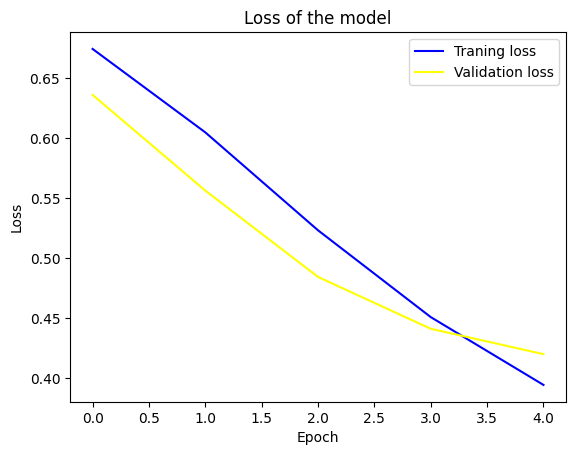

In [75]:
plt.plot(history.history['loss'], color="blue", label="Traning loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation loss")
plt.title("Loss of the model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# LSTM (Long Short-Term Memory)

In [76]:
encoder =  tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))


In [91]:
vocab = encoder.get_vocabulary()
print(vocab)

['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine', 'in', 'flavors', 'to', 'it', 'its', 'on', 'fruit', 'aromas', 'palate', 'that', 'from', 'acidity', 'finish', 'but', 'tannins', 'drink', 'cherry', 'ripe', 'black', 'are', 'has', 'for', 'by', 'spice', 'notes', 'as', 'rich', 'an', 'red', 'nose', 'oak', 'fresh', 'now', 'dry', 'berry', 'fruits', 'plum', 'blackberry', 'blend', 'apple', 'through', 'texture', 'offers', 'soft', 'white', 'while', 'dark', 'crisp', 'sweet', 'shows', 'at', 'cabernet', 'citrus', 'well', 'more', 'very', 'bright', 'vanilla', 'light', 'pepper', 'full', 'firm', 'juicy', 'raspberry', 'good', 'will', 'some', 'years', 'chocolate', 'peach', 'fruity', 'lemon', 'green', 'structure', 'dried', 'character', 'touch', 'balanced', 'out', 'not', 'all', 'pear', 'sauvignon', 'or', 'spicy', 'be', 'concentrated', 'smooth', 'up', 'long', 'herb', 'licorice', 'made', 'tannic', 'pinot', 'fine', 'into', 'also', 'there', 'just', 'mineral', 'wood', 'still', 'age', 'dense', 'no

In [95]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim = len(vocab),
        output_dim = 32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

In [96]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [98]:
model.evaluate(train_data)
model.evaluate(val_data)

13/13 [==============================] - 2s 176ms/step - loss: 0.6931 - accuracy: 0.5092


[0.6930749416351318, 0.5091906189918518]

In [99]:
history = model.fit(train_data, epochs = 5, validation_data = val_data)

Epoch 1/5
32/32 [==============================] - 27s 616ms/step - loss: 0.6890 - accuracy: 0.5963 - val_loss: 0.6783 - val_accuracy: 0.6691
Epoch 2/5
32/32 [==============================] - 19s 588ms/step - loss: 0.6009 - accuracy: 0.7171 - val_loss: 0.5029 - val_accuracy: 0.7606
Epoch 3/5
32/32 [==============================] - 16s 512ms/step - loss: 0.4481 - accuracy: 0.7976 - val_loss: 0.4240 - val_accuracy: 0.8043
Epoch 4/5
32/32 [==============================] - 16s 502ms/step - loss: 0.3884 - accuracy: 0.8270 - val_loss: 0.3954 - val_accuracy: 0.8167
Epoch 5/5
32/32 [==============================] - 17s 530ms/step - loss: 0.3611 - accuracy: 0.8403 - val_loss: 0.3856 - val_accuracy: 0.8229


In [100]:
model.evaluate(test_data)

114/114 [==============================] - 21s 179ms/step - loss: 0.3805 - accuracy: 0.8258


[0.38049790263175964, 0.8258104920387268]

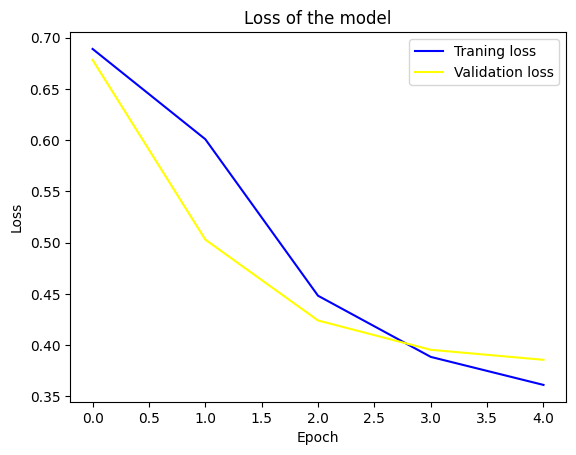

In [101]:
plt.plot(history.history['loss'], color="blue", label="Traning loss")
plt.plot(history.history['val_loss'], color="yellow", label="Validation loss")
plt.title("Loss of the model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()